In [61]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier 

In [62]:
df = pd.read_csv('train.csv')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [64]:
df.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [65]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [66]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [67]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [68]:
p=df.isnull().sum()/len(df)*100
new = pd.concat([df.isnull().sum(), p],axis=1,keys=['Total','%'])
new

,Total,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [69]:
df.drop(columns={'PassengerId'},axis=1,inplace=True)

In [70]:
df.drop(columns={'Cabin','Ticket'},inplace=True)

In [71]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)   

In [72]:
mean = df.groupby(['Sex'])['Age'].transform('mean')
df['Age'] = df['Age'].fillna(mean)

In [73]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [74]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embarked = pd.get_dummies(df['Embarked'],drop_first=True)
df.drop(['Sex','Embarked','Name'],axis=1,inplace=True)
df = pd.concat([df,sex,embarked],axis=1)
df.head(20)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.000000,1,0,7.2500,1,0,1
1,1,1,38.000000,1,0,71.2833,0,0,0
2,1,3,26.000000,0,0,7.9250,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,1
5,0,3,30.726645,0,0,8.4583,1,1,0
6,0,1,54.000000,0,0,51.8625,1,0,1
7,0,3,2.000000,3,1,21.0750,1,0,1
8,1,3,27.000000,0,2,11.1333,0,0,1
9,1,2,14.000000,1,0,30.0708,0,0,0


In [75]:

data_input = df.drop('Survived',axis=1)
data_output = df['Survived']

In [76]:

x, x_test, y, y_test = train_test_split(data_input, data_output,test_size=0.2, random_state=0)

# add a validation set
x_train,x_val, y_train,y_val = train_test_split(x,y,test_size=0.2)

In [77]:
model = DecisionTreeClassifier(random_state=4,max_depth=4)
#change the max of depth 
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=4)

[Text(1019.7931034482759, 1956.96, 'X[5] <= 0.5\ngini = 0.474\nsamples = 569\nvalue = [349, 220]'),
 Text(423.3103448275862, 1522.0800000000002, 'X[0] <= 2.5\ngini = 0.374\nsamples = 197\nvalue = [49, 148]'),
 Text(153.93103448275863, 1087.2, 'X[1] <= 2.5\ngini = 0.126\nsamples = 104\nvalue = [7, 97]'),
 Text(76.96551724137932, 652.3200000000002, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(230.89655172413796, 652.3200000000002, 'X[4] <= 22.0\ngini = 0.11\nsamples = 103\nvalue = [6, 97]'),
 Text(153.93103448275863, 217.44000000000005, 'gini = 0.269\nsamples = 25\nvalue = [4, 21]'),
 Text(307.86206896551727, 217.44000000000005, 'gini = 0.05\nsamples = 78\nvalue = [2, 76]'),
 Text(692.6896551724138, 1087.2, 'X[4] <= 23.35\ngini = 0.495\nsamples = 93\nvalue = [42, 51]'),
 Text(538.7586206896552, 652.3200000000002, 'X[1] <= 27.958\ngini = 0.458\nsamples = 76\nvalue = [27, 49]'),
 Text(461.79310344827593, 217.44000000000005, 'gini = 0.419\nsamples = 67\nvalue = [20, 47]'),
 Text(615.72

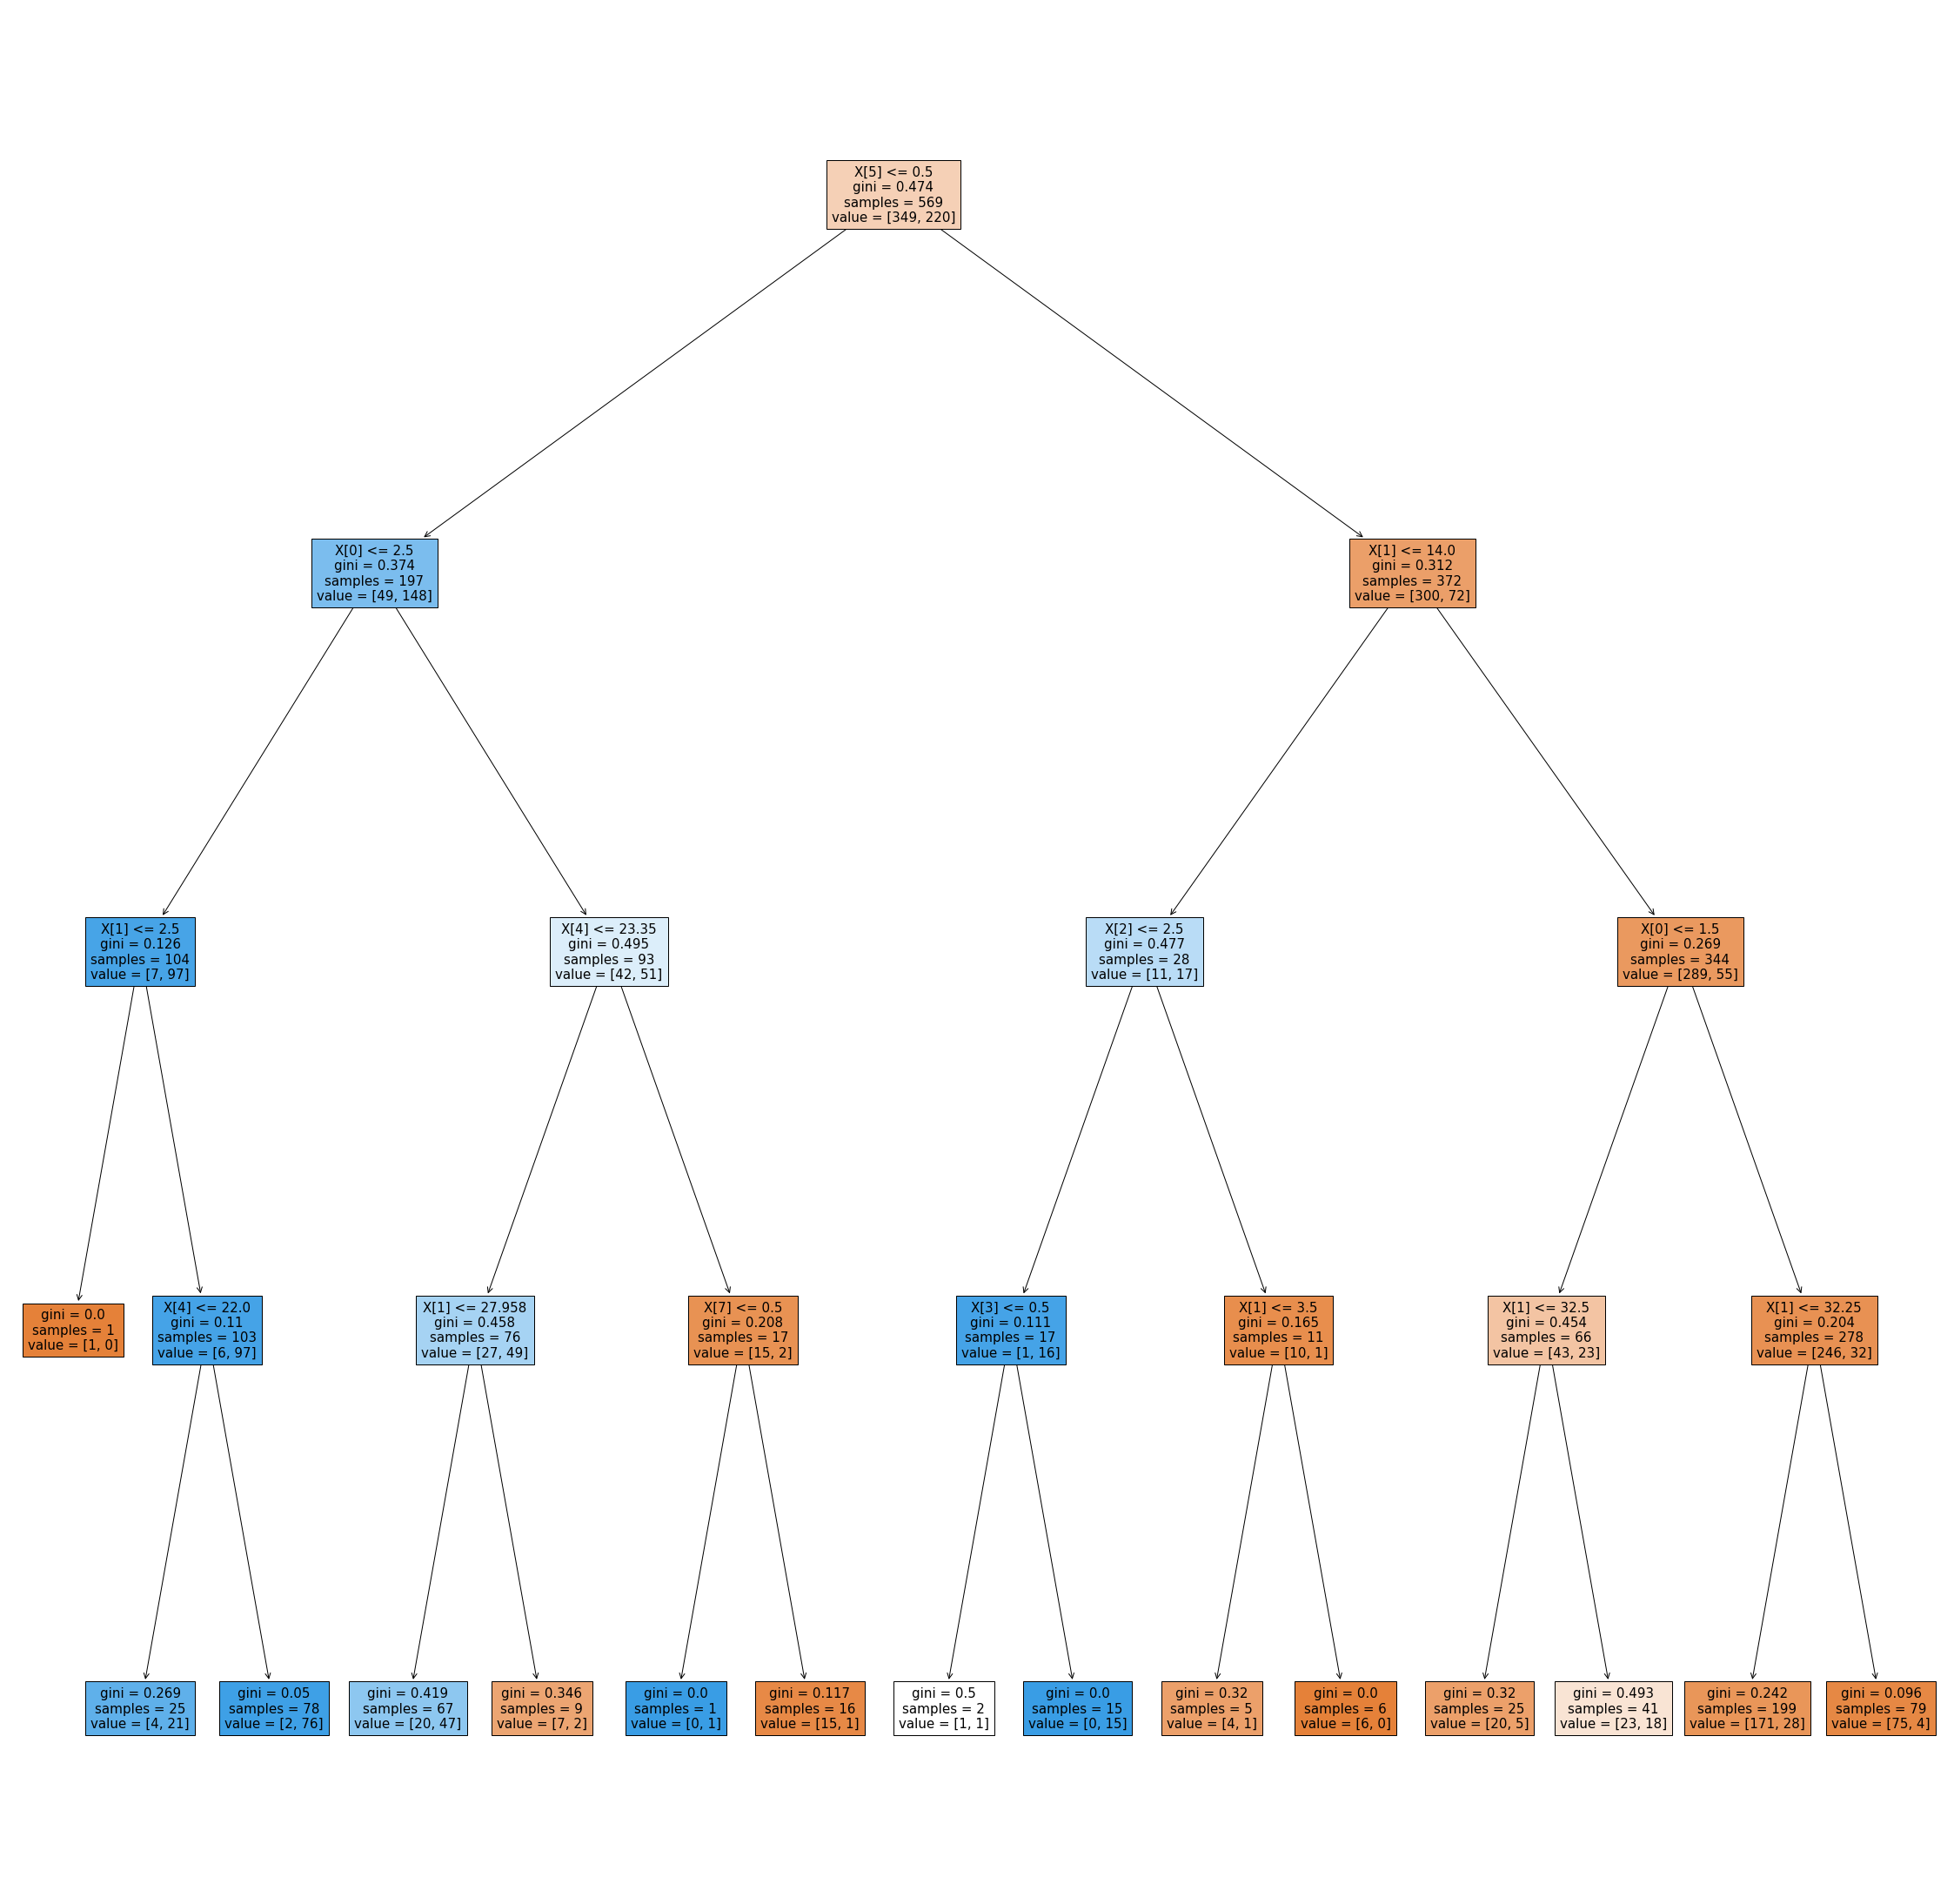

In [78]:
from sklearn import tree
plt.figure(figsize=(40,40))
tree.plot_tree(model,filled=True)

In [79]:
print(tree.export_text(model))

|--- feature_5 <= 0.50
|   |--- feature_0 <= 2.50
|   |   |--- feature_1 <= 2.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  2.50
|   |   |   |--- feature_4 <= 22.00
|   |   |   |   |--- class: 1
|   |   |   |--- feature_4 >  22.00
|   |   |   |   |--- class: 1
|   |--- feature_0 >  2.50
|   |   |--- feature_4 <= 23.35
|   |   |   |--- feature_1 <= 27.96
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  27.96
|   |   |   |   |--- class: 0
|   |   |--- feature_4 >  23.35
|   |   |   |--- feature_7 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_7 >  0.50
|   |   |   |   |--- class: 0
|--- feature_5 >  0.50
|   |--- feature_1 <= 14.00
|   |   |--- feature_2 <= 2.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  2.50
|   |   |   |--- feature_1 <= 3.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  3.50
|   |   |   |   |--- class: 0
|   

We can see in every case whether the feature is in class 0 or 1 using the gini cost function 

In [80]:
y_predicted_val=model.predict(x_train)
print("The model accuracy on the Validation set : ",accuracy_score(y_train,y_predicted_val))

y_predicted = model.predict(x_test)
print("The model accuracy on the testing set : ",accuracy_score(y_test, y_predicted))

The model accuracy on the Validation set :  0.8488576449912126
The model accuracy on the testing set :  0.8212290502793296


In [81]:
model = DecisionTreeClassifier(criterion="entropy", splitter="random",random_state=4,max_depth=3)
#change the max of depth 
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=4,
                       splitter='random')

[Text(1116.0, 1902.6000000000001, 'X[5] <= 0.294\nentropy = 0.963\nsamples = 569\nvalue = [349, 220]'),
 Text(558.0, 1359.0, 'X[0] <= 1.937\nentropy = 0.809\nsamples = 197\nvalue = [49, 148]'),
 Text(279.0, 815.4000000000001, 'X[3] <= 1.86\nentropy = 0.301\nsamples = 56\nvalue = [3, 53]'),
 Text(139.5, 271.79999999999995, 'entropy = 0.149\nsamples = 47\nvalue = [1, 46]'),
 Text(418.5, 271.79999999999995, 'entropy = 0.764\nsamples = 9\nvalue = [2, 7]'),
 Text(837.0, 815.4000000000001, 'X[0] <= 2.449\nentropy = 0.911\nsamples = 141\nvalue = [46, 95]'),
 Text(697.5, 271.79999999999995, 'entropy = 0.414\nsamples = 48\nvalue = [4, 44]'),
 Text(976.5, 271.79999999999995, 'entropy = 0.993\nsamples = 93\nvalue = [42, 51]'),
 Text(1674.0, 1359.0, 'X[0] <= 1.258\nentropy = 0.709\nsamples = 372\nvalue = [300, 72]'),
 Text(1395.0, 815.4000000000001, 'X[1] <= 20.874\nentropy = 0.956\nsamples = 69\nvalue = [43, 26]'),
 Text(1255.5, 271.79999999999995, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 

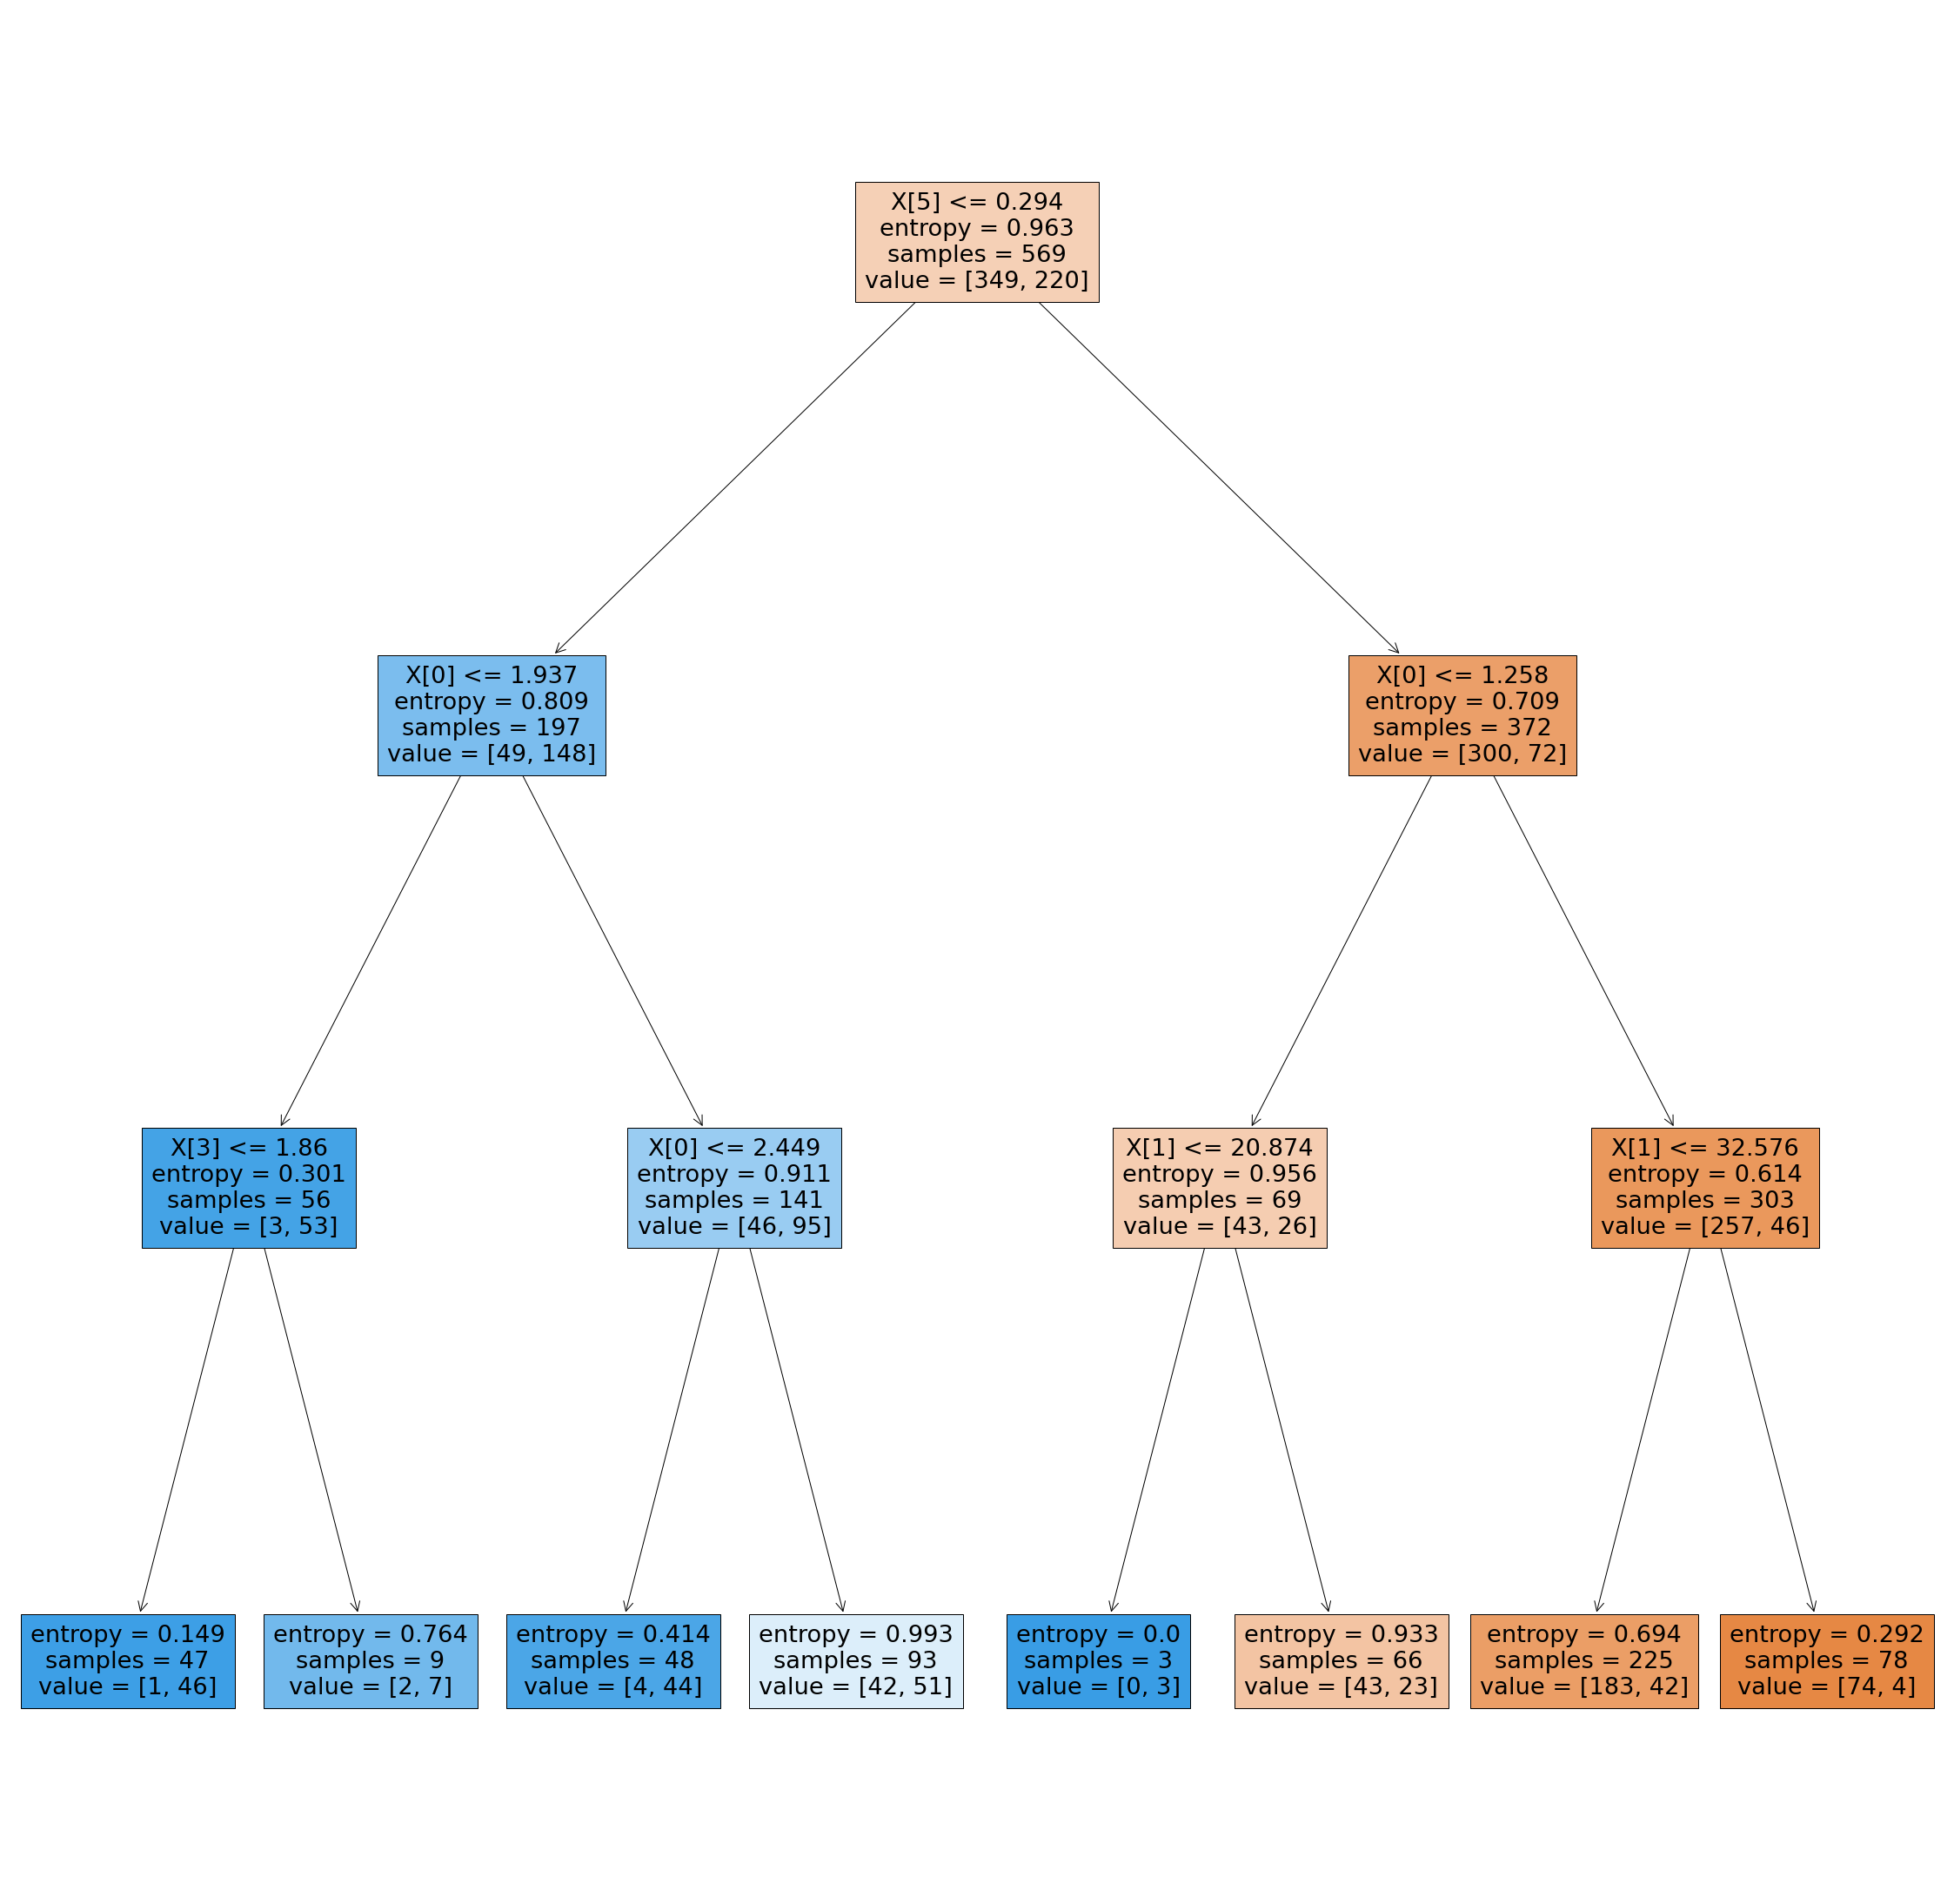

In [82]:
from sklearn import tree
plt.figure(figsize=(40,40))
tree.plot_tree(model,filled=True)

In [83]:
y_predicted_val=model.predict(x_train)
print("The model accuracy on the Validation set : ",accuracy_score(y_train,y_predicted_val))

y_predicted = model.predict(x_test)
print("The model accuracy on the testing set : ",accuracy_score(y_test, y_predicted))

The model accuracy on the Validation set :  0.7926186291739895
The model accuracy on the testing set :  0.776536312849162


Both model accuracies on the validation and testing sets are smaller than the previous results

In [84]:
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", accuracy_score(y_test, y_pred)) 

Accuracy: 0.8435754189944135


In [86]:
#Change the number of estimators
clf=RandomForestClassifier(n_estimators=8000) 
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", accuracy_score(y_test, y_pred)) 

Accuracy: 0.8324022346368715


The accuracy is smaller with a larger number of estimators